<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>

# Image matching using local features¶

Faisal Qureshi   
Professor    
Faculty of Science    
Ontario Tech University    
Oshawa ON Canada    
http://vclab.science.ontariotechu.ca

# Copyright information
© Faisal Qureshi

# License

This work is licensed under a [Creative Commons Attribution-NonCommercial 4.0 International License.](https://creativecommons.org/licenses/by-nc/4.0/)

# Outline
This notebook contains code for constructing KAZE keypoints and feature descriptor.

```
KAZE Features. Pablo F. Alcantarilla, Adrien Bartoli and Andrew J. Davison. In European Conference on Computer Vision (ECCV), Fiorenze, Italy, October 2012.
```
Your task is to use local features computed from a given triplet of images (A, B, C) to decide which of the three pairs---(A,B), (A,C), and (B,C)---is the closest (or most similar). E.g., if your triplet contains two images of CN tower and one image of Eiffel tower then your algorithm should return the pair containing the two CN tower images.



# Bonus challenge
While it is not necessary, it is worthwhile for you to test out your code on images from this dataset. https://image-matching-workshop.github.io/challenge/

In [128]:
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.stats as st
%matplotlib inline

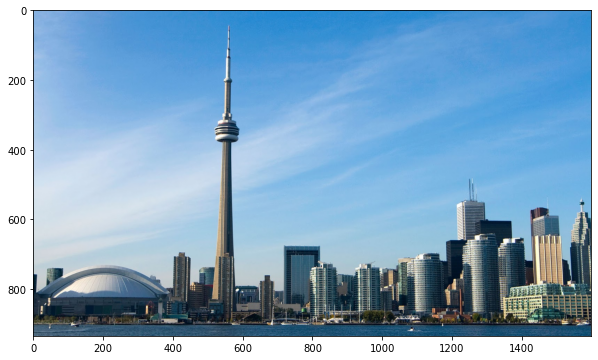

In [129]:
img_file = 'data/cn-tower-1.jpg'

img = cv.imread(img_file)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img);

# Computing KAZE keypoints and feature descriptor

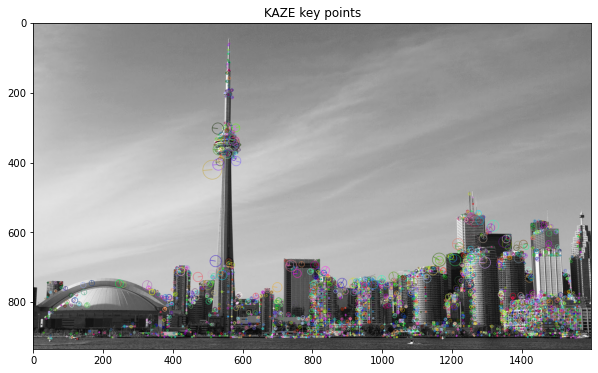

In [130]:
img = cv.imread(img_file)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
src = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

akaze = cv.AKAZE_create()
kp, desc = akaze.detectAndCompute(img, None)

img = cv.drawKeypoints(src, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.title('KAZE key points')
plt.imshow(img);

## Task
1. Construct an image triplet using files
    * 'data/cn-tower-1.jpg'
    * 'data/cn-tower-2.jpg'
    * 'data/eiffel-tower.jpeg'
2. Compute KAZE keypoints and features for each image
3. Match descriptors between image pairs and record the fraction of "good" matches
4. Use good match counts to decide which two images are closer to each other
5. Corrupt the images, say by drawing circles on them, and see if you can still pick out the correct image pair.
    * 'data/cn-tower-1-corrupted.jpg'
    * 'data/cn-tower-2-corrupted.jpg'

### Construct an image triplet using files
* 'data/cn-tower-1.jpg'
* 'data/cn-tower-2.jpg'
* 'data/eiffel-tower.jpeg'

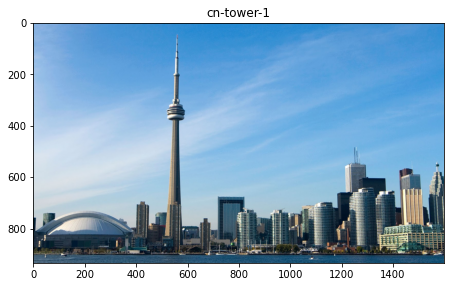

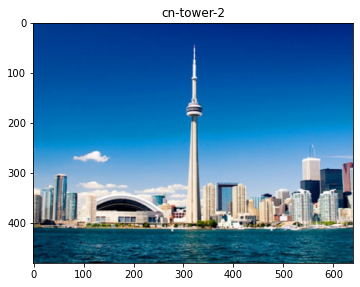

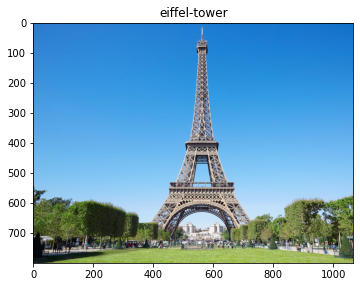

In [131]:
img_file1 = 'data/cn-tower-1.jpg'

img1 = cv.imread(img_file1)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.subplot(311)
plt.title('cn-tower-1')
plt.imshow(img1);

img_file2 = 'data/cn-tower-2.jpg'

img2 = cv.imread(img_file2)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.subplot(312)
plt.title('cn-tower-2')
plt.imshow(img2);

img_file3 = 'data/eiffel-tower.jpeg'

img3 = cv.imread(img_file3)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.subplot(313)
plt.title('eiffel-tower')
plt.imshow(img3);

### Compute KAZE keypoints and features for each image

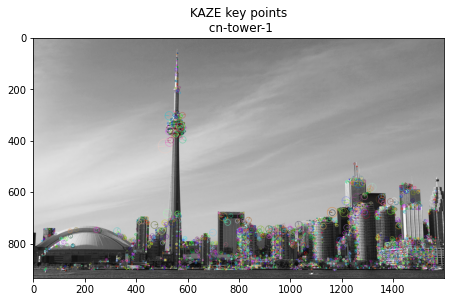

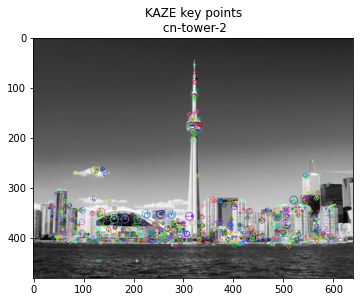

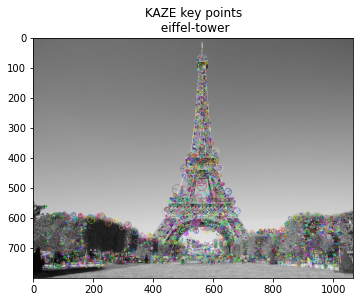

In [132]:
## 'data/cn-tower-1.jpg'
img1 = cv.imread(img_file1)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
src = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)

akaze = cv.AKAZE_create()
kp1, desc1 = akaze.detectAndCompute(img1, None)
img1 = cv.drawKeypoints(src, kp1, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

## 'data/cn-tower-2.jpg'
img2 = cv.imread(img_file2)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
src = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

akaze = cv.AKAZE_create()
kp2, desc2 = akaze.detectAndCompute(img2, None)
img2= cv.drawKeypoints(src, kp2, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

## 'data/eiffel-tower.jpeg'
img3 = cv.imread(img_file3)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
src = cv.cvtColor(img3, cv.COLOR_RGB2GRAY)

akaze = cv.AKAZE_create()
kp3, desc3 = akaze.detectAndCompute(img3, None)
img3 = cv.drawKeypoints(src, kp3, img3, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



plt.figure(figsize=(15,15))
plt.subplot(311)
plt.title('KAZE key points\n cn-tower-1')
plt.imshow(img1);

plt.figure(figsize=(15,15))
plt.subplot(312)
plt.title('KAZE key points\n cn-tower-2')
plt.imshow(img2);

plt.figure(figsize=(15,15))
plt.subplot(313)
plt.title('KAZE key points\n eiffel-tower')
plt.imshow(img3);

### Match descriptors between image pairs and record the fraction of "good" matches

### Use good match counts to decide which two images are closer to each other

In [134]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10
img1 = cv.imread('data/cn-tower-1.jpg',0) 
img2 = cv.imread('data/cn-tower-2.jpg',0) 
img3 = cv.imread('data/eiffel-tower.jpeg', 0)

sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
kp3, des3 = sift.detectAndCompute(img3,None)


FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)

In [135]:
matches = flann.knnMatch(des1,des2,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
    print("Images are {}/{}".format(len(good),MIN_MATCH_COUNT), "close in fraction")
else:
    print("Images are {}/{}".format(len(good),MIN_MATCH_COUNT), "different in fraction" )
    matchesMask = None
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img1_2 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

Images are 43/10 close in fraction


In [136]:
matches = flann.knnMatch(des1,des3,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp3[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img3 = cv.polylines(img3,[np.int32(dst)],True,255,3, cv.LINE_AA)
    print("Images are {}/{}".format(len(good),MIN_MATCH_COUNT), "close in fraction")
else:
    print("Images are {}/{}".format(len(good),MIN_MATCH_COUNT), "different in fraction" )
    matchesMask = None
draw_params = dict(matchColor = (255,0,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img1_3 = cv.drawMatches(img1,kp1,img3,kp3,good,None,**draw_params)

Images are 20/10 close in fraction


In [137]:

matches = flann.knnMatch(des2,des3,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp2[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp3[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img2.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img3 = cv.polylines(img3,[np.int32(dst)],True,255,3, cv.LINE_AA)
    print("Images are {}/{}".format(len(good),MIN_MATCH_COUNT), "close in fraction")
else:
    print("Images are {}/{}".format(len(good),MIN_MATCH_COUNT), "different in fraction" )
    matchesMask = None
draw_params = dict(matchColor = (5,0,255), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img2_3 = cv.drawMatches(img2,kp2,img3,kp3,good,None,**draw_params)

Images are 8/10 different in fraction


### Since the images cn-tower-1.jpg and cn-tower-2.jpg gave the highest fraction of "good" matches they are the closest

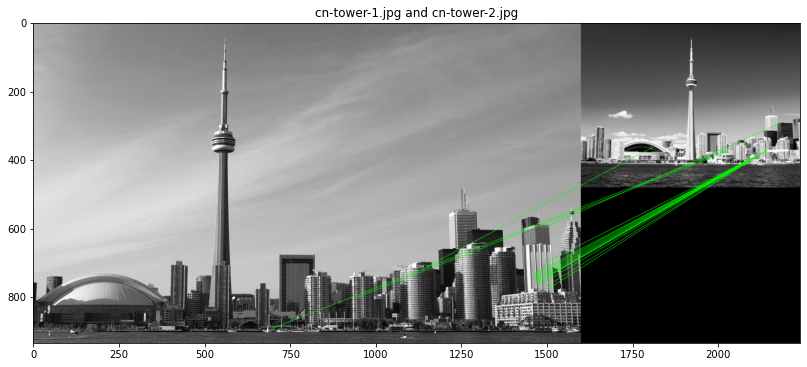

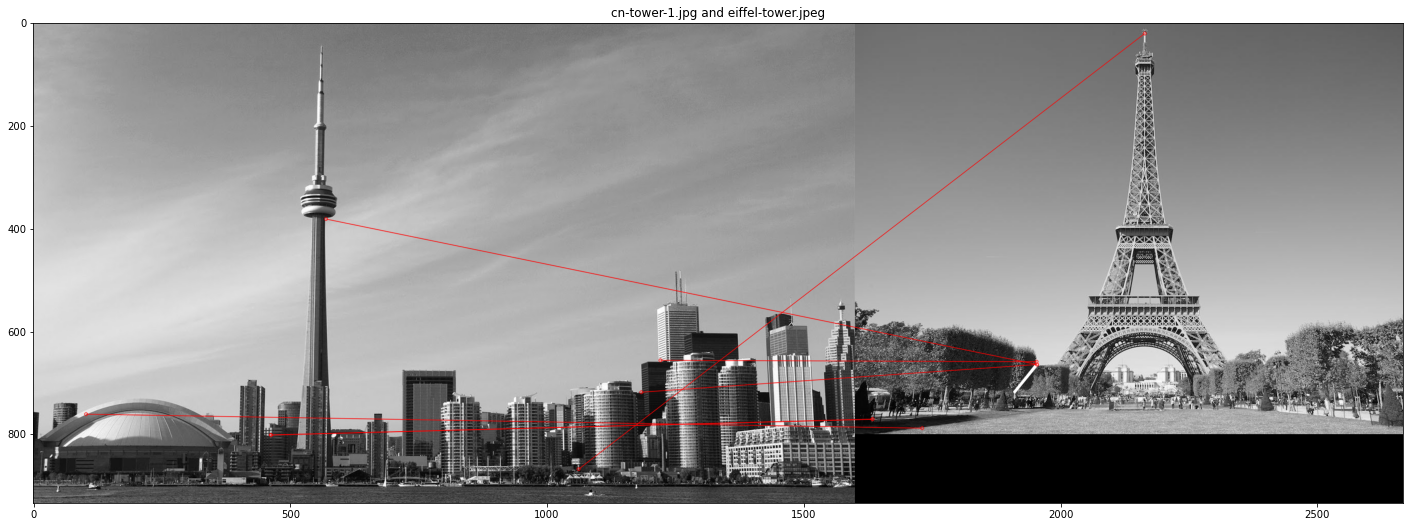

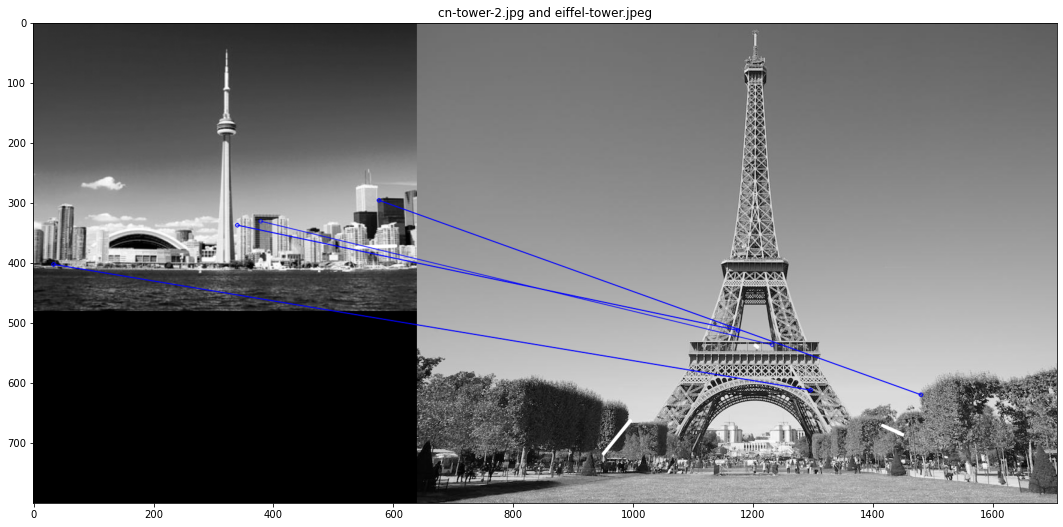

In [105]:
plt.figure(figsize=(30,20))
plt.subplot(311)
plt.title('cn-tower-1.jpg and cn-tower-2.jpg')
plt.imshow(img1_2)
plt.show()
plt.figure(figsize=(30,30))
plt.subplot(312)
plt.title('cn-tower-1.jpg and eiffel-tower.jpeg')
plt.imshow(img1_3)
plt.show()
plt.figure(figsize=(30,30))
plt.subplot(313)
plt.title('cn-tower-2.jpg and eiffel-tower.jpeg')
plt.imshow(img2_3)
plt.show()

### Corrupt the images, say by drawing circles on them, and see if you can still pick out the correct image pair.
* 'data/cn-tower-1-corrupted.jpg'
* 'data/cn-tower-2-corrupted.jpg'

Images are 22/10 close in fraction


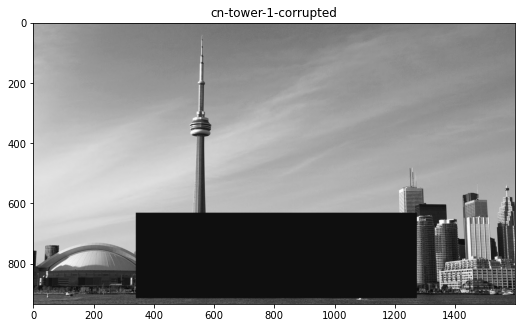

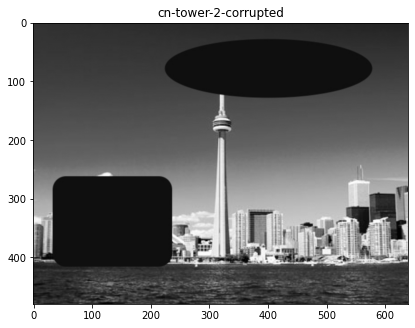

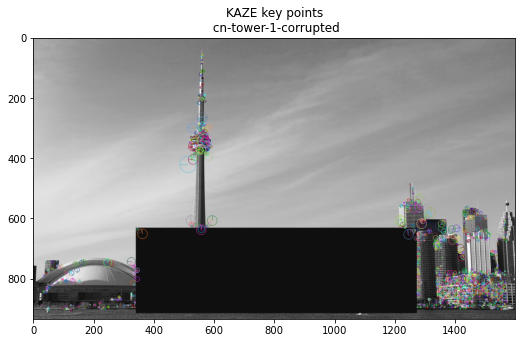

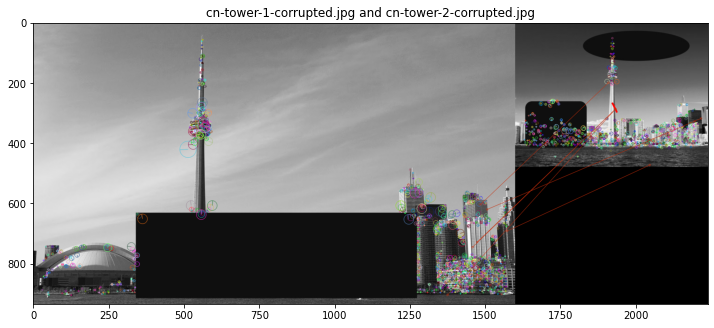

In [142]:
img_file4 = 'data/cn-tower-1-corrupted.jpg'

img4 = cv.imread(img_file4,0)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
plt.figure(figsize=(30,30))
plt.subplot(511)
plt.title('cn-tower-1-corrupted')
plt.imshow(img4);

img_file5 = 'data/cn-tower-2-corrupted.jpg'

img5 = cv.imread(img_file5,0)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
plt.figure(figsize=(30,30))
plt.subplot(512)
plt.title('cn-tower-2-corrupted')
plt.imshow(img5);

## 'data/cn-tower-1-corrupted.jpg'
img4 = cv.imread(img_file4)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
src = cv.cvtColor(img4, cv.COLOR_RGB2GRAY)

akaze = cv.AKAZE_create()
kp4, desc4 = akaze.detectAndCompute(img4, None)
img4 = cv.drawKeypoints(src, kp4, img4, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

## 'data/cn-tower-2-corrupted.jpg'
img5 = cv.imread(img_file5)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
src = cv.cvtColor(img5, cv.COLOR_RGB2GRAY)

akaze = cv.AKAZE_create()
kp5, desc5 = akaze.detectAndCompute(img2, None)
img5 = cv.drawKeypoints(src, kp5, img5, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(30,30))
plt.subplot(513)
plt.title('KAZE key points\n cn-tower-1-corrupted')
plt.imshow(img4);

plt.figure(figsize=(30,30))
plt.subplot(514)
plt.title('KAZE key points\n cn-tower-2-corrupted')
plt.imshow(img5);

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

sift = cv.SIFT_create()

kp4, des4 = sift.detectAndCompute(img4,None)
kp5, des5 = sift.detectAndCompute(img5,None)



FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des4,des5,k=2)
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp4[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp5[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img4.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img5 = cv.polylines(img5,[np.int32(dst)],True,255,3, cv.LINE_AA)
    print("Images are {}/{}".format(len(good),MIN_MATCH_COUNT), "close in fraction")
else:
    print("Images are {}/{}".format(len(good),MIN_MATCH_COUNT), "different in fraction" )
    matchesMask = None
draw_params = dict(matchColor = (200,45,10), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img4_5 = cv.drawMatches(img4,kp4,img5,kp5,good,None,**draw_params)
plt.title('cn-tower-1-corrupted.jpg and cn-tower-2-corrupted.jpg')
plt.imshow(img4_5)
plt.show()

## Submission
Include code and results on the images found in the above folder in a single jupyter notebook. Submit via canvas.

<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>